# Momentum Strategies

Cross-Sectional Momentum.

Trade idea: Ir long el 10% de los ETFs que mas rindieron durante en los últimos 12/6/3 meses e ir short el 10% que menos rindió en los últimos 12/6/3 meses.

Universo: ETFs de paises catalogados como "Desarrollados" o "Emergentes" según MSCI con inception al 01/05/2010. 

Rebalanceo: Mensual.

Importación de paquetes.

In [1]:
import pandas as pd
import eikon as ek
import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import datetime
import warnings 
warnings.filterwarnings("ignore")

Lista con ETFs de paises:

In [2]:
rics = ["EWC", #Canada
"SPY", #Estados Unidos
"EWO", #Austria
"EWK", #Belgica
"EWQ", #Francia
"EWG", #Alemania
"EWI", #Italia
"EWN", #Paises Bajos
"EWP", #España
"EWD", #Suecia
"EWL", #Suiza
"EWU", #Reino Unido
"EWA", #Australia
"EWH", #Hong Kong
"EWJ", #Japon
"EWS", #Singapur
"EWZ", #Brasil
"EWW", #Mexico
"EWY", #Corea
"EWM", #Malasia
"EWT", #Taiwan
"ECH", #Chile
"EPU", #Peru
"EGPT.K", #Egipto
"EZA", #Sudafrica
"TUR.O", #Turquia
"EIDO.K", #Indonesia
"THD"] #Tailandia    

Ingreso de API Key

In [3]:
ek.set_app_key('#IngreseApiKey')

Descarga de datos:

In [4]:
data = pd.DataFrame()
for ric in rics:
    data[ric] = ek.get_timeseries(ric, 
                     fields='CLOSE',
                     start_date='2010-05-01',  
                     end_date='2020-04-02',
                     interval='monthly')['CLOSE']

In [5]:
data

,EWC,SPY,EWO,EWK,EWQ,EWG,EWI,EWN,EWP,EWD,...,EWY,EWM,EWT,ECH,EPU,EGPT.K,EZA,TUR.O,EIDO.K,THD
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-31,26.1700,109.3690,16.6200,11.2600,20.560000,19.15,28.56,17.650000,33.58,22.83,...,44.000,44.36,22.720,55.410,33.32,72.0160,51.915873,54.000000,22.210,44.04
2010-06-30,24.8700,103.2200,15.2700,10.8440,19.560000,18.71,27.60,17.110000,31.83,22.83,...,44.710,45.76,22.400,56.690,32.91,70.1600,48.558726,52.930000,24.200,46.07
2010-07-31,26.6600,110.2700,18.1900,12.2200,22.400000,20.74,32.62,19.380000,39.47,26.08,...,49.050,49.08,24.820,62.650,34.69,71.5200,55.937070,61.790000,26.030,50.30
2010-08-31,26.1000,105.3100,17.1500,11.6900,20.850000,19.31,29.72,17.760000,36.81,24.26,...,47.790,51.56,24.280,67.650,36.16,72.7860,53.861911,60.460000,25.247,55.32
2010-09-30,28.0300,114.1300,19.7050,13.2800,23.990000,22.00,33.60,20.320000,40.65,28.97,...,53.490,54.96,27.100,74.020,42.45,76.1596,61.996535,70.030000,29.080,62.06
2010-10-31,28.9225,118.4900,21.0700,14.0100,25.320000,23.83,35.82,20.850000,42.94,29.20,...,54.390,56.28,27.800,75.840,46.71,75.6400,62.466905,73.990000,30.060,63.32
2010-11-30,29.3300,118.4925,19.1700,12.3736,22.490000,22.53,30.22,18.880000,34.57,28.37,...,53.970,54.48,28.180,76.630,47.60,77.0800,61.535389,66.940000,27.870,62.87
2010-12-31,31.0000,125.7500,22.3300,13.1300,24.450000,23.94,32.76,21.090000,36.74,31.23,...,61.190,57.52,31.240,79.600,50.36,80.7600,68.876841,66.210000,29.100,64.61
2011-01-31,31.2900,128.6800,22.5500,13.4100,26.000000,25.17,36.26,21.710000,41.87,32.23,...,61.400,56.84,31.140,71.360,48.45,70.0000,60.493198,59.990000,25.930,58.60


Retornos logaritmicos mensuales

In [6]:
ret_mensual = np.log(data/data.shift(1))
ret_mensual.dropna(inplace=True)

In [7]:
ret_mensual

,EWC,SPY,EWO,EWK,EWQ,EWG,EWI,EWN,EWP,EWD,...,EWY,EWM,EWT,ECH,EPU,EGPT.K,EZA,TUR.O,EIDO.K,THD
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-30,-0.050951,-0.057865,-0.084717,-0.037645,-0.049861,-0.023245,-0.034191,-0.031073,-0.053521,0.000000,...,0.016008,0.031072,-0.014185,0.022838,-0.012381,-0.026110,-0.066851,-0.020014,0.085810,0.045064
2010-07-31,0.069502,0.066069,0.174982,0.119462,0.135574,0.103006,0.167110,0.124579,0.215132,0.133093,...,0.092643,0.070041,0.102589,0.099966,0.052675,0.019199,0.141453,0.154771,0.072897,0.087843
2010-08-31,-0.021229,-0.046024,-0.058874,-0.044340,-0.071707,-0.071441,-0.093105,-0.087293,-0.069771,-0.072340,...,-0.026024,0.049295,-0.021997,0.076784,0.041502,0.017546,-0.037804,-0.021760,-0.030542,0.095129
2010-09-30,0.071340,0.080430,0.138874,0.127525,0.140283,0.130419,0.122706,0.134657,0.099229,0.177432,...,0.112678,0.063859,0.109881,0.089988,0.160373,0.045308,0.140655,0.146942,0.141343,0.114967
2010-10-31,0.031344,0.037490,0.066978,0.053512,0.053958,0.079903,0.063980,0.025748,0.054805,0.007908,...,0.016686,0.023734,0.025502,0.024291,0.095631,-0.006846,0.007558,0.055006,0.033145,0.020100
2010-11-30,0.013991,0.000021,-0.094504,-0.124206,-0.118524,-0.056098,-0.170002,-0.099251,-0.216818,-0.028836,...,-0.007752,-0.032506,0.013576,0.010363,0.018874,0.018859,-0.015024,-0.100133,-0.075645,-0.007132
2010-12-31,0.055376,0.059446,0.152585,0.059335,0.083559,0.060703,0.080704,0.110696,0.060880,0.096047,...,0.125555,0.054299,0.103087,0.038025,0.056364,0.046638,0.112708,-0.010965,0.043187,0.027300
2011-01-31,0.009311,0.023033,0.009804,0.021101,0.061466,0.050102,0.101507,0.028974,0.130704,0.031519,...,0.003426,-0.011892,-0.003206,-0.109277,-0.038665,-0.142987,-0.129789,-0.098654,-0.115338,-0.097635
2011-02-28,0.073309,0.034148,0.007070,0.025387,0.032169,0.032444,0.020743,0.033518,0.004290,-0.008100,...,-0.055933,-0.009901,-0.054781,-0.020958,-0.018330,-0.006306,0.056031,-0.020717,0.057694,0.052197


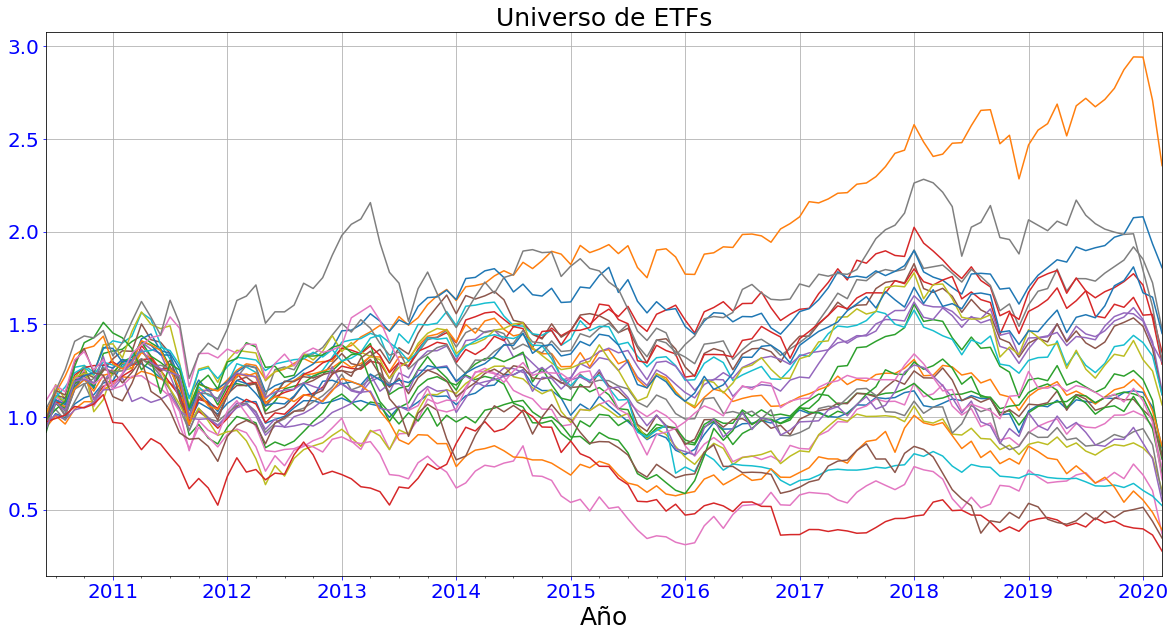

In [10]:
ret_mensual.cumsum().apply(np.exp).plot(figsize=(20,10))
plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.xlabel('Año', fontsize=25, color='black')
plt.title('Universo de ETFs',fontsize=25, color='black')
plt.legend().remove()
plt.grid()

Cross - Sectional 12 Meses.


Calculo retornos de los últimos 12 meses.

In [11]:
ret_anual = np.log(data/data.shift(12))

In [12]:
ret_anual

,EWC,SPY,EWO,EWK,EWQ,EWG,EWI,EWN,EWP,EWD,...,EWY,EWM,EWT,ECH,EPU,EGPT.K,EZA,TUR.O,EIDO.K,THD
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ret_anual.dropna(inplace=True)

In [14]:
ret_anual

,EWC,SPY,EWO,EWK,EWQ,EWG,EWI,EWN,EWP,EWD,...,EWY,EWM,EWT,ECH,EPU,EGPT.K,EZA,TUR.O,EIDO.K,THD
Date,,,,,,,,,,,,,,,,,,,,,
2011-05-31,0.228859,0.209806,0.336988,0.283455,0.311710,0.349074,0.266450,0.252510,0.252604,0.423265,...,0.405617,0.307326,0.327377,0.329045,0.270504,-0.123018,0.258297,0.129891,0.357350,0.431021
2011-06-30,0.241708,0.245712,0.399114,0.263272,0.345777,0.362696,0.243798,0.231186,0.280588,0.330762,...,0.374190,0.289429,0.304065,0.284811,0.133759,-0.130766,0.299999,0.118685,0.279696,0.321350
2011-07-31,0.148886,0.159435,0.148875,0.086943,0.116194,0.215205,-0.032402,0.044407,-0.019443,0.139362,...,0.291954,0.205549,0.200158,0.105201,0.212420,-0.227628,0.140658,-0.101430,0.273561,0.356158
2011-08-31,0.135589,0.148914,0.084920,0.071783,0.079711,0.080083,-0.087868,0.038657,-0.024197,0.097706,...,0.170958,0.096790,0.123806,-0.000739,0.144704,-0.323288,0.164760,-0.201424,0.263549,0.181357
2011-09-30,-0.094989,-0.008624,-0.272156,-0.188364,-0.230570,-0.185782,-0.346523,-0.214934,-0.229003,-0.231201,...,-0.138538,-0.120106,-0.137440,-0.330277,-0.190981,-0.544106,-0.173022,-0.386511,-0.118127,-0.153292
2011-10-31,-0.023880,0.057477,-0.276512,-0.187905,-0.163542,-0.116944,-0.282670,-0.122290,-0.197622,-0.094762,...,0.018399,-0.013596,-0.071179,-0.187557,-0.170700,-0.450626,-0.066065,-0.436277,-0.007681,-0.072360
2011-11-30,-0.065880,0.053384,-0.262782,-0.102334,-0.090697,-0.088101,-0.169826,-0.074189,-0.049818,-0.106262,...,0.037994,0.030371,-0.131809,-0.264337,-0.152681,-0.548905,-0.029508,-0.386084,0.068969,-0.020245
2011-12-31,-0.153076,-0.001990,-0.451282,-0.214990,-0.222122,-0.219599,-0.311988,-0.202147,-0.193709,-0.216919,...,-0.157753,-0.070584,-0.288109,-0.321584,-0.271921,-0.758115,-0.201192,-0.475851,0.007191,-0.072193
2012-01-31,-0.107173,0.020308,-0.361438,-0.181874,-0.222663,-0.165538,-0.336472,-0.185736,-0.302520,-0.182632,...,-0.068063,-0.007062,-0.199815,-0.137061,-0.113766,-0.356675,0.014230,-0.215505,0.158055,0.103191


Creo un dataframe vacio para almacenar los resultados.

In [15]:
tickers_ganadores = pd.DataFrame(index=ret_anual.index, columns= ['Primero','Segundo','Tercero','Ultimo','AnteUltimo','AntePenultimo'])

In [16]:
tickers_ganadores

,Primero,Segundo,Tercero,Ultimo,AnteUltimo,AntePenultimo
Date,,,,,,
2011-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-30,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
for i in range(0,len(ret_anual)):
    tickers_ganadores.iat[i,0] = ret_anual.iloc[i].sort_values(ascending=False).index[0]
    tickers_ganadores.iat[i,1] = ret_anual.iloc[i].sort_values(ascending=False).index[1]
    tickers_ganadores.iat[i,2] = ret_anual.iloc[i].sort_values(ascending=False).index[2]
    tickers_ganadores.iat[i,3] = ret_anual.iloc[i].sort_values(ascending=True).index[0]
    tickers_ganadores.iat[i,4] = ret_anual.iloc[i].sort_values(ascending=True).index[1]
    tickers_ganadores.iat[i,5] = ret_anual.iloc[i].sort_values(ascending=True).index[2]

In [18]:
tickers_ganadores

,Primero,Segundo,Tercero,Ultimo,AnteUltimo,AntePenultimo
Date,,,,,,
2011-05-31,THD,EWD,EWY,EGPT.K,EWJ,TUR.O
2011-06-30,EWO,EWY,EWG,EGPT.K,TUR.O,EWJ
2011-07-31,THD,EWY,EIDO.K,EGPT.K,TUR.O,EWI
2011-08-31,EIDO.K,EWW,THD,EGPT.K,TUR.O,EWI
2011-09-30,SPY,EWJ,EWL,EGPT.K,EWZ,TUR.O
2011-10-31,SPY,EWY,EWL,EGPT.K,TUR.O,EWI
2011-11-30,EIDO.K,SPY,EWY,EGPT.K,TUR.O,ECH
2011-12-31,EIDO.K,SPY,EWM,EGPT.K,TUR.O,EWO
2012-01-31,EIDO.K,THD,SPY,EWO,EGPT.K,EWI


Desplazo hacia abajo una vez para evitar el look ahead bias.

In [19]:
tickers_ganadores_bis = tickers_ganadores.shift(1)
tickers_ganadores_bis.dropna(inplace=True)
tickers_ganadores_bis

,Primero,Segundo,Tercero,Ultimo,AnteUltimo,AntePenultimo
Date,,,,,,
2011-06-30,THD,EWD,EWY,EGPT.K,EWJ,TUR.O
2011-07-31,EWO,EWY,EWG,EGPT.K,TUR.O,EWJ
2011-08-31,THD,EWY,EIDO.K,EGPT.K,TUR.O,EWI
2011-09-30,EIDO.K,EWW,THD,EGPT.K,TUR.O,EWI
2011-10-31,SPY,EWJ,EWL,EGPT.K,EWZ,TUR.O
2011-11-30,SPY,EWY,EWL,EGPT.K,TUR.O,EWI
2011-12-31,EIDO.K,SPY,EWY,EGPT.K,TUR.O,ECH
2012-01-31,EIDO.K,SPY,EWM,EGPT.K,TUR.O,EWO
2012-02-29,EIDO.K,THD,SPY,EWO,EGPT.K,EWI


In [20]:
tickers_ganadores_retornos = (pd.DataFrame({'Primero':0.0,'Segundo':0.0,'Tercero':0.0,'Ultimo':0.0,'AnteUltimo':0.0,'AntePenultimo':0.0},index=ret_anual.index)).iloc[1:]

In [21]:
tickers_ganadores_retornos

,Primero,Segundo,Tercero,Ultimo,AnteUltimo,AntePenultimo
Date,,,,,,
2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0
2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0
2011-08-31,0.0,0.0,0.0,0.0,0.0,0.0
2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-31,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-30,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-31,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-31,0.0,0.0,0.0,0.0,0.0,0.0
2012-02-29,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
for i in range(0,len(tickers_ganadores_retornos)):
        tickers_ganadores_retornos.iat[i,0] = ret_mensual[tickers_ganadores_bis.iat[i,0]][i+12]
        tickers_ganadores_retornos.iat[i,1] = ret_mensual[tickers_ganadores_bis.iat[i,1]][i+12]
        tickers_ganadores_retornos.iat[i,2] = ret_mensual[tickers_ganadores_bis.iat[i,2]][i+12]
        tickers_ganadores_retornos.iat[i,3] = ret_mensual[tickers_ganadores_bis.iat[i,3]][i+12]
        tickers_ganadores_retornos.iat[i,4] = ret_mensual[tickers_ganadores_bis.iat[i,4]][i+12]
        tickers_ganadores_retornos.iat[i,5] = ret_mensual[tickers_ganadores_bis.iat[i,5]][i+12]

In [23]:
tickers_ganadores_retornos

,Primero,Segundo,Tercero,Ultimo,AnteUltimo,AntePenultimo
Date,,,,,,
2011-06-30,-0.064607,-0.092503,-0.015419,-0.033858,0.015459,-0.031219
2011-07-31,-0.075258,0.010407,-0.044486,-0.077663,-0.065344,0.026492
2011-08-31,-0.079671,-0.147020,-0.040554,-0.078113,-0.121754,-0.148572
2011-09-30,-0.240332,-0.182390,-0.219682,-0.175511,-0.038145,-0.135949
2011-10-31,0.103591,-0.006363,0.081533,0.086634,0.181648,0.005241
2011-11-30,-0.004072,0.011843,-0.049727,-0.079420,-0.049941,-0.057158
2011-12-31,-0.018591,0.004072,-0.070191,-0.162572,-0.100731,-0.019221
2012-01-31,0.035527,0.045331,0.051629,0.258454,0.161692,0.099648
2012-02-29,-0.016601,0.099402,0.042490,0.059913,0.137808,0.031918


Resultado de la posición long y short, y total estrategia.

In [24]:
tickers_ganadores_retornos['long'] = (tickers_ganadores_retornos['Primero'] + tickers_ganadores_retornos['Segundo'] + tickers_ganadores_retornos['Tercero'])/3 
tickers_ganadores_retornos['short'] = -1 * ((tickers_ganadores_retornos['Ultimo'] + tickers_ganadores_retornos['AnteUltimo'] + tickers_ganadores_retornos['AntePenultimo'])/3) 
tickers_ganadores_retornos['total'] = tickers_ganadores_retornos['long'] + tickers_ganadores_retornos['short']

In [25]:
tickers_ganadores_retornos['total']

Date
2011-06-30   -0.040970
2011-07-31    0.002393
2011-08-31    0.027064
2011-09-30   -0.097600
2011-10-31   -0.031587
                ...   
2019-11-30    0.043864
2019-12-31   -0.029192
2020-01-31    0.041721
2020-02-29    0.040372
2020-03-31    0.118869
Name: total, Length: 106, dtype: float64

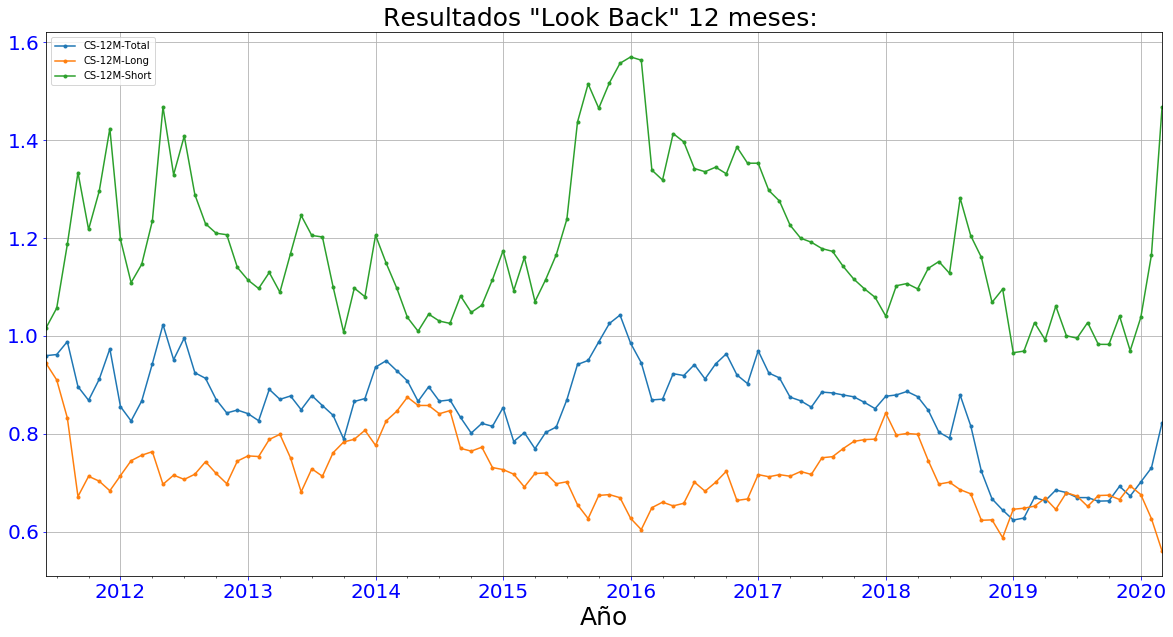

In [27]:
tickers_ganadores_retornos['total'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-12M-Total")
tickers_ganadores_retornos['long'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-12M-Long")
tickers_ganadores_retornos['short'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-12M-Short")

plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.xlabel('Año', fontsize=25, color='black')
plt.title('Resultados "Look Back" 12 meses: ',fontsize=25, color='black')

plt.legend(loc="upper left")

plt.grid()

Replico el cálculo para 6 y 3 meses.

In [28]:
ret_semi = np.log(data/data.shift(6))

ret_semi.dropna(inplace=True)

tickers_ganadores_s = pd.DataFrame(index=ret_semi.index, columns= ['Primero','Segundo','Tercero','Ultimo','AnteUltimo','AntePenultimo'])

for i in range(0,len(ret_semi)):
    tickers_ganadores_s.iat[i,0] = ret_semi.iloc[i].sort_values(ascending=False).index[0]
    tickers_ganadores_s.iat[i,1] = ret_semi.iloc[i].sort_values(ascending=False).index[1]
    tickers_ganadores_s.iat[i,2] = ret_semi.iloc[i].sort_values(ascending=False).index[2]
    tickers_ganadores_s.iat[i,3] = ret_semi.iloc[i].sort_values(ascending=True).index[0]
    tickers_ganadores_s.iat[i,4] = ret_semi.iloc[i].sort_values(ascending=True).index[1]
    tickers_ganadores_s.iat[i,5] = ret_semi.iloc[i].sort_values(ascending=True).index[2]
    
tickers_ganadores_s_bis = tickers_ganadores_s.shift(1)
tickers_ganadores_s_bis.dropna(inplace=True)

tickers_ganadores_s_retornos = (pd.DataFrame({'Primero':0.0,'Segundo':0.0,'Tercero':0.0,'Ultimo':0.0,'AnteUltimo':0.0,'AntePenultimo':0.0},index=ret_semi.index)).iloc[1:]

for i in range(0,len(tickers_ganadores_s_retornos)):
        tickers_ganadores_s_retornos.iat[i,0] = ret_mensual[tickers_ganadores_s_bis.iat[i,0]][i+6]
        tickers_ganadores_s_retornos.iat[i,1] = ret_mensual[tickers_ganadores_s_bis.iat[i,1]][i+6]
        tickers_ganadores_s_retornos.iat[i,2] = ret_mensual[tickers_ganadores_s_bis.iat[i,2]][i+6]
        tickers_ganadores_s_retornos.iat[i,3] = ret_mensual[tickers_ganadores_s_bis.iat[i,3]][i+6]
        tickers_ganadores_s_retornos.iat[i,4] = ret_mensual[tickers_ganadores_s_bis.iat[i,4]][i+6]
        tickers_ganadores_s_retornos.iat[i,5] = ret_mensual[tickers_ganadores_s_bis.iat[i,5]][i+6]

tickers_ganadores_s_retornos['long'] = (tickers_ganadores_s_retornos['Primero'] + tickers_ganadores_s_retornos['Segundo'] + tickers_ganadores_s_retornos['Tercero'])/3 
tickers_ganadores_s_retornos['short'] = -1 * ((tickers_ganadores_s_retornos['Ultimo'] + tickers_ganadores_s_retornos['AnteUltimo'] + tickers_ganadores_s_retornos['AntePenultimo'])/3) 
tickers_ganadores_s_retornos['total'] = tickers_ganadores_s_retornos['long'] + tickers_ganadores_s_retornos['short']



ret_trim = np.log(data/data.shift(3))
ret_trim.dropna(inplace=True)

tickers_ganadores_t = pd.DataFrame(index=ret_trim.index, columns= ['Primero','Segundo','Tercero','Ultimo','AnteUltimo','AntePenultimo'])

for i in range(0,len(ret_trim)):
    tickers_ganadores_t.iat[i,0] = ret_trim.iloc[i].sort_values(ascending=False).index[0]
    tickers_ganadores_t.iat[i,1] = ret_trim.iloc[i].sort_values(ascending=False).index[1]
    tickers_ganadores_t.iat[i,2] = ret_trim.iloc[i].sort_values(ascending=False).index[2]
    tickers_ganadores_t.iat[i,3] = ret_trim.iloc[i].sort_values(ascending=True).index[0]
    tickers_ganadores_t.iat[i,4] = ret_trim.iloc[i].sort_values(ascending=True).index[1]
    tickers_ganadores_t.iat[i,5] = ret_trim.iloc[i].sort_values(ascending=True).index[2]
    
tickers_ganadores_t_bis = tickers_ganadores_t.shift(1)
tickers_ganadores_t_bis.dropna(inplace=True)
tickers_ganadores_t_bis

tickers_ganadores_t_retornos = (pd.DataFrame({'Primero':0.0,'Segundo':0.0,'Tercero':0.0,'Ultimo':0.0,'AnteUltimo':0.0,'AntePenultimo':0.0},index=ret_trim.index)).iloc[1:]

for i in range(0,len(tickers_ganadores_t_retornos)):
        tickers_ganadores_t_retornos.iat[i,0] = ret_mensual[tickers_ganadores_t_bis.iat[i,0]][i+3]
        tickers_ganadores_t_retornos.iat[i,1] = ret_mensual[tickers_ganadores_t_bis.iat[i,1]][i+3]
        tickers_ganadores_t_retornos.iat[i,2] = ret_mensual[tickers_ganadores_t_bis.iat[i,2]][i+3]
        tickers_ganadores_t_retornos.iat[i,3] = ret_mensual[tickers_ganadores_t_bis.iat[i,3]][i+3]
        tickers_ganadores_t_retornos.iat[i,4] = ret_mensual[tickers_ganadores_t_bis.iat[i,4]][i+3]
        tickers_ganadores_t_retornos.iat[i,5] = ret_mensual[tickers_ganadores_t_bis.iat[i,5]][i+3]
        
tickers_ganadores_t_retornos['long'] = (tickers_ganadores_t_retornos['Primero'] + tickers_ganadores_t_retornos['Segundo'] + tickers_ganadores_t_retornos['Tercero'])/3 
tickers_ganadores_t_retornos['short'] = -1 * ((tickers_ganadores_t_retornos['Ultimo'] + tickers_ganadores_t_retornos['AnteUltimo'] + tickers_ganadores_t_retornos['AntePenultimo'])/3) 
tickers_ganadores_t_retornos['total'] = tickers_ganadores_t_retornos['long'] + tickers_ganadores_t_retornos['short']

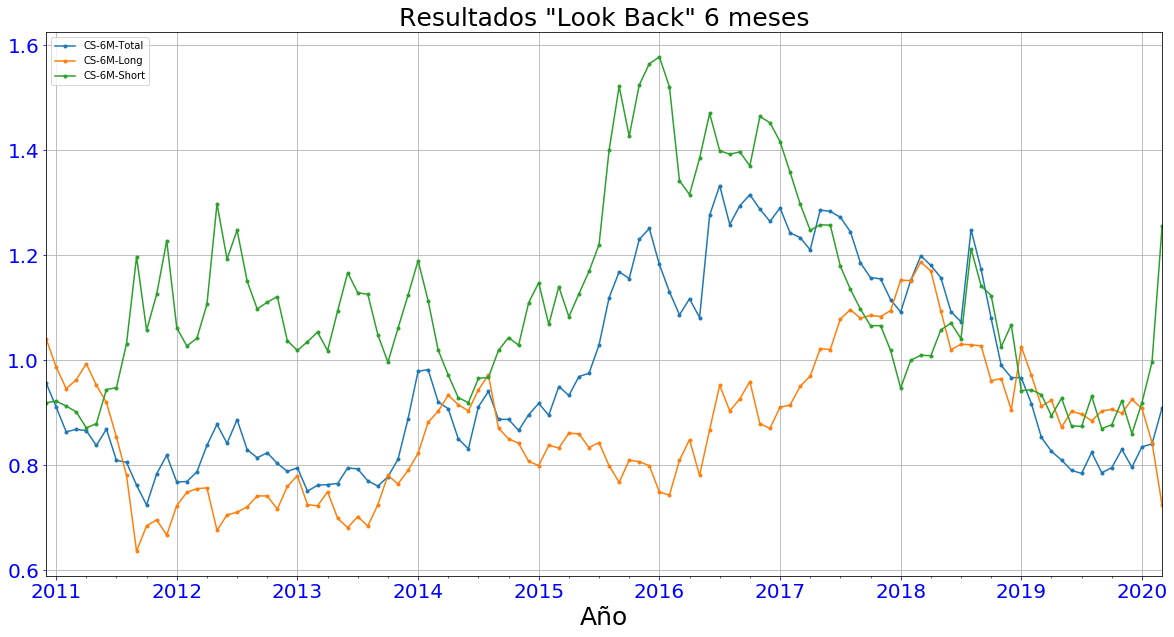

In [30]:
tickers_ganadores_s_retornos['total'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-6M-Total")
tickers_ganadores_s_retornos['long'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-6M-Long")
tickers_ganadores_s_retornos['short'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-6M-Short")

plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.xlabel('Año', fontsize=25, color='black')
plt.title('Resultados "Look Back" 6 meses',fontsize=25, color='black')

plt.legend(loc="upper left")

plt.grid()

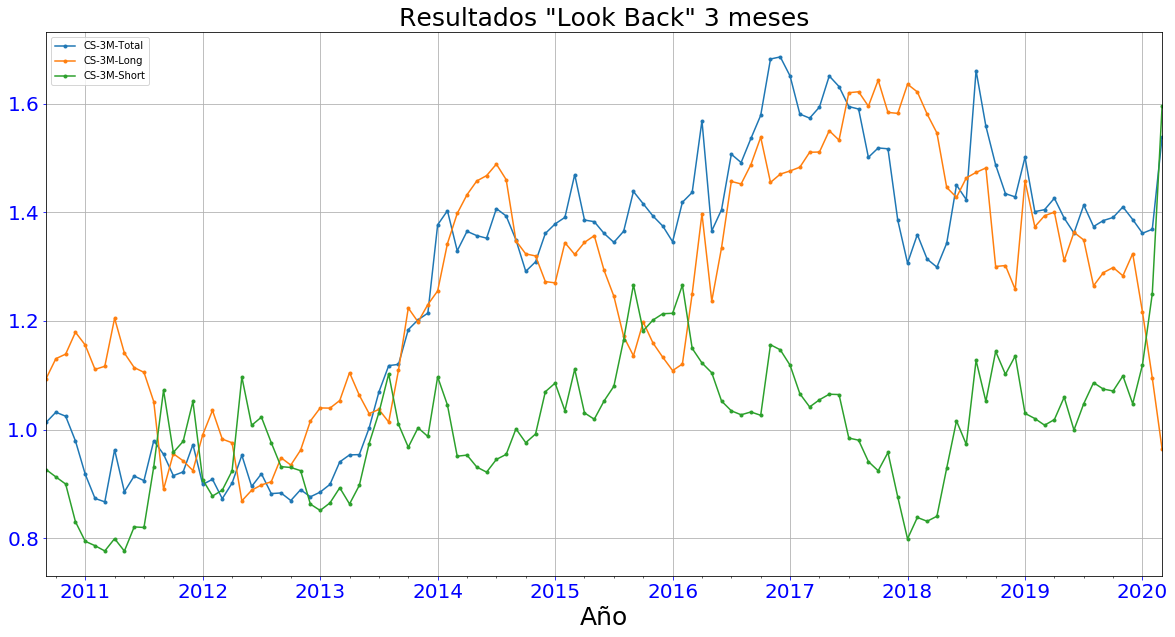

In [33]:
tickers_ganadores_t_retornos['total'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-3M-Total")
tickers_ganadores_t_retornos['long'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-3M-Long")
tickers_ganadores_t_retornos['short'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-3M-Short")

plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.xlabel('Año', fontsize=25, color='black')
plt.title('Resultados "Look Back" 3 meses',fontsize=25, color='black')

plt.legend(loc="upper left")

plt.grid()

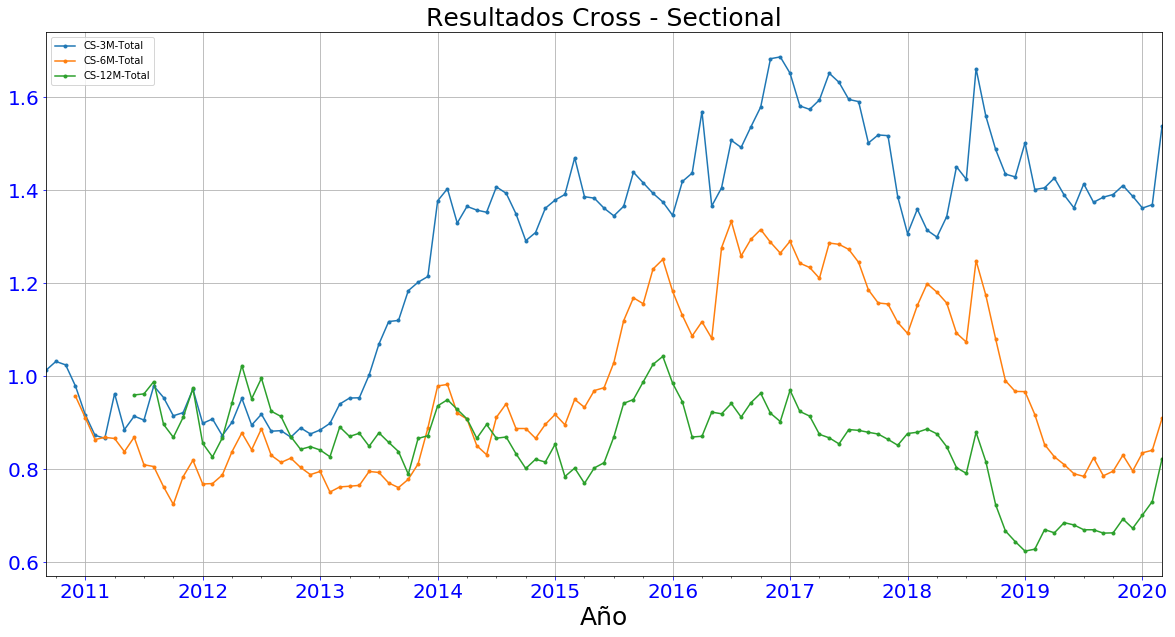

In [34]:
tickers_ganadores_t_retornos['total'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-3M-Total")
tickers_ganadores_s_retornos['total'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-6M-Total")
tickers_ganadores_retornos['total'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="CS-12M-Total")

plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.xlabel('Año', fontsize=25, color='black')
plt.title('Resultados Cross - Sectional',fontsize=25, color='black')

plt.legend(loc="upper left")

plt.grid()

Time Series Momentum

Trade idea: Ir long todos los ETFs que rindieron positivo durante los últimos 12/6/3 meses e ir short todos los ETFs que rindieron negativo duranto los últimos 12/6/3 meses.

Universo: ETFs de paises catalogados como "Desarrollados" y "Emergentes" según MSCI con inception al 01/05/2010. 

Rebalanceo: Mensual.


Clasifico como True o False cuales ETFs rindieron positivo los últimos 12 meses.


In [35]:
clasificacion = ret_anual > 0

In [36]:
clasificacion

,EWC,SPY,EWO,EWK,EWQ,EWG,EWI,EWN,EWP,EWD,...,EWY,EWM,EWT,ECH,EPU,EGPT.K,EZA,TUR.O,EIDO.K,THD
Date,,,,,,,,,,,,,,,,,,,,,
2011-05-31,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,True
2011-06-30,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,True
2011-07-31,True,True,True,True,True,True,False,True,False,True,...,True,True,True,True,True,False,True,False,True,True
2011-08-31,True,True,True,True,True,True,False,True,False,True,...,True,True,True,False,True,False,True,False,True,True
2011-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2011-10-31,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2011-11-30,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
2011-12-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2012-01-31,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True


Armo dos dataframes, clasificacion long, True = 1 y False = 0, clasificación short, True = 0 y False = 1

In [37]:
clasificacion_l = clasificacion.replace({True:1,False:0})
clasificacion_s = clasificacion.replace({True:0,False:1})

In [38]:
clasificacion_s.shift(1)

,EWC,SPY,EWO,EWK,EWQ,EWG,EWI,EWN,EWP,EWD,...,EWY,EWM,EWT,ECH,EPU,EGPT.K,EZA,TUR.O,EIDO.K,THD
Date,,,,,,,,,,,,,,,,,,,,,
2011-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2011-08-31,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2011-10-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-11-30,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-12-31,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2012-01-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


Para evitar el Look Ahead Bias bajo 1 fila la señal.

In [39]:
long_signal = clasificacion_l.shift(1)
short_signal = clasificacion_s.shift(1)
long_signal.dropna(inplace=True)
short_signal.dropna(inplace=True)

In [40]:
long_signal

,EWC,SPY,EWO,EWK,EWQ,EWG,EWI,EWN,EWP,EWD,...,EWY,EWM,EWT,ECH,EPU,EGPT.K,EZA,TUR.O,EIDO.K,THD
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-30,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2011-07-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2011-08-31,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2011-09-30,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2011-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-02-29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


Cuento por mes cuantos ETFs voy a invertir ya que mi portfolio será equally weighted

In [41]:
long_signal['count'] = long_signal.sum(axis=1)
short_signal['count'] = short_signal.sum(axis=1)

In [42]:
short_signal['count']

Date
2011-06-30     1.0
2011-07-31     1.0
2011-08-31     4.0
2011-09-30     6.0
2011-10-31    28.0
              ... 
2019-11-30     3.0
2019-12-31     8.0
2020-01-31     2.0
2020-02-29    13.0
2020-03-31    22.0
Name: count, Length: 106, dtype: float64

In [43]:
ret_men_anual = ret_mensual.loc[datetime.date(year=2011,month=6,day=30):]

In [44]:
retornos_long_anual = long_signal * ret_men_anual
retornos_short_anual = (short_signal * ret_men_anual) * -1

Cálculo los resultados y grafico.

In [45]:
retornos_long_anual['resultado'] = ((retornos_long_anual.sum(axis=1)) / long_signal['count']).fillna(0)
retornos_short_anual['resultado'] = ((retornos_short_anual.sum(axis=1)) / short_signal['count']).fillna(0)
retorno_total = retornos_long_anual['resultado'] + retornos_short_anual['resultado']

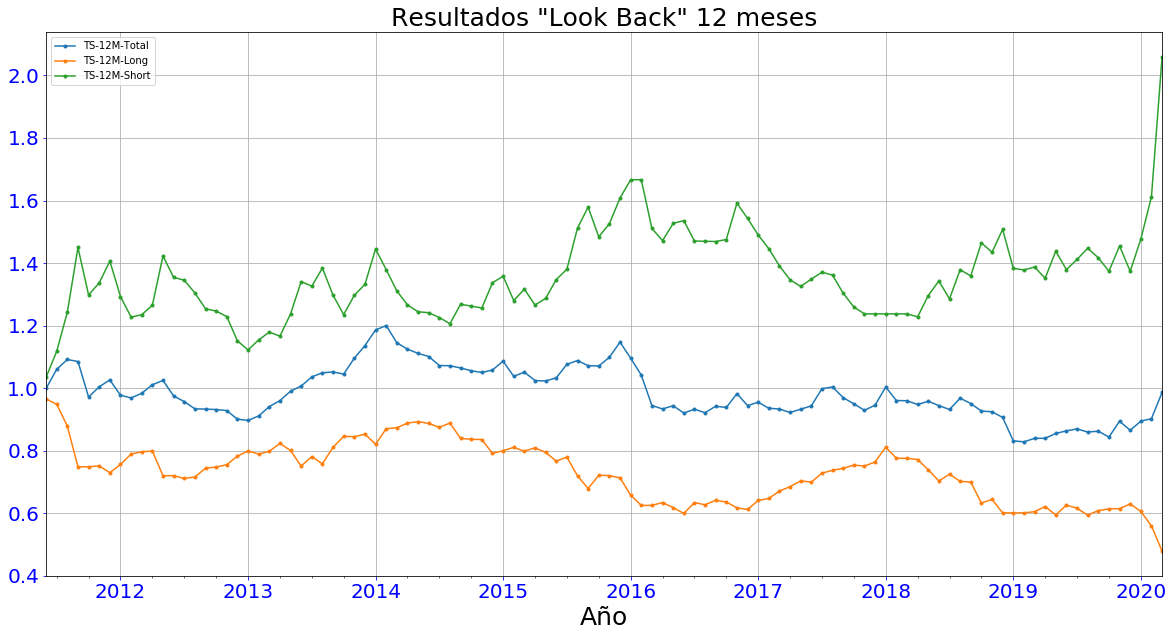

In [46]:
retorno_total.cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="TS-12M-Total")
retornos_long_anual['resultado'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="TS-12M-Long")
retornos_short_anual['resultado'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="TS-12M-Short")

plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.xlabel('Año', fontsize=25, color='black')
plt.title('Resultados "Look Back" 12 meses',fontsize=25, color='black')

plt.legend(loc="upper left")
plt.grid()

Realizo mismo cálculo para 6 y 3 meses.

In [47]:
clasificacion_semi = ret_semi > 0

clasificacion_semi_l = clasificacion_semi.replace({True:1,False:0})
clasificacion_semi_s = clasificacion_semi.replace({True:0,False:1})

long_signal_semi = clasificacion_semi_l.shift(1)
short_signal_semi = clasificacion_semi_s.shift(1)
long_signal_semi.dropna(inplace=True)
short_signal_semi.dropna(inplace=True)

long_signal_semi['count'] = long_signal_semi.sum(axis=1)
short_signal_semi['count'] = short_signal_semi.sum(axis=1)

ret_men_semi = ret_mensual.loc[datetime.date(year=2010,month=12,day=31):]

retornos_long_semi = long_signal_semi * ret_men_semi
retornos_short_semi = (short_signal_semi * ret_men_semi) * -1

retornos_long_semi['resultado'] = ((retornos_long_semi.sum(axis=1)) / long_signal_semi['count']).fillna(0)
retornos_short_semi['resultado'] = ((retornos_short_semi.sum(axis=1)) / short_signal_semi['count']).fillna(0)
retorno_total_semi = retornos_long_semi['resultado'] + retornos_short_semi['resultado']

clasificacion_trim = ret_trim > 0

clasificacion_trim_l = clasificacion_trim.replace({True:1,False:0})
clasificacion_trim_s = clasificacion_trim.replace({True:0,False:1})

long_signal_trim = clasificacion_trim_l.shift(1)
short_signal_trim = clasificacion_trim_s.shift(1)
long_signal_trim.dropna(inplace=True)
short_signal_trim.dropna(inplace=True)

long_signal_trim['count'] = long_signal_trim.sum(axis=1)
short_signal_trim['count'] = short_signal_trim.sum(axis=1)

ret_men_trim = ret_mensual.loc[datetime.date(year=2010,month=9,day=30):]

retornos_long_trim = long_signal_trim * ret_men_trim
retornos_short_trim = (short_signal_trim * ret_men_trim) * -1

retornos_long_trim['resultado'] = ((retornos_long_trim.sum(axis=1)) / long_signal_trim['count']).fillna(0)
retornos_short_trim['resultado'] = ((retornos_short_trim.sum(axis=1)) / short_signal_trim['count']).fillna(0)
retorno_total_trim = retornos_long_trim['resultado'] + retornos_short_trim['resultado']

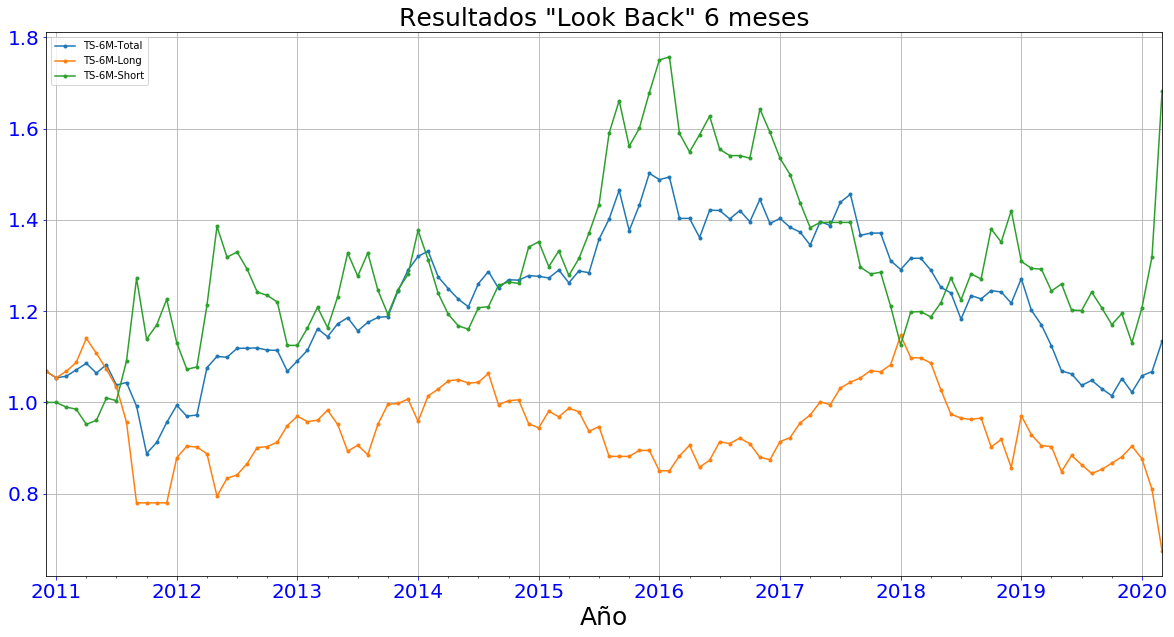

In [48]:
retorno_total_semi.cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="TS-6M-Total")
retornos_long_semi['resultado'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="TS-6M-Long")
retornos_short_semi['resultado'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="TS-6M-Short")

plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.xlabel('Año', fontsize=25, color='black')
plt.title('Resultados "Look Back" 6 meses',fontsize=25, color='black')

plt.legend(loc="upper left")
plt.grid()

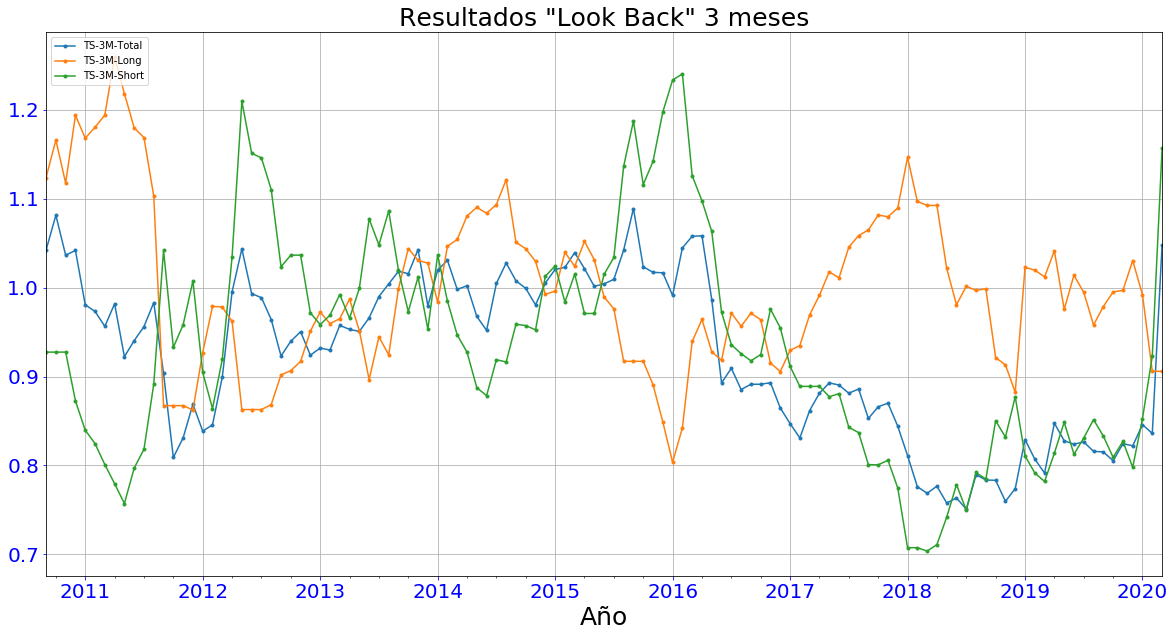

In [49]:
retorno_total_trim.cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="TS-3M-Total")
retornos_long_trim['resultado'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="TS-3M-Long")
retornos_short_trim['resultado'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label ="TS-3M-Short")

plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.xlabel('Año', fontsize=25, color='black')
plt.title('Resultados "Look Back" 3 meses',fontsize=25, color='black')

plt.legend(loc="upper left")
plt.grid()

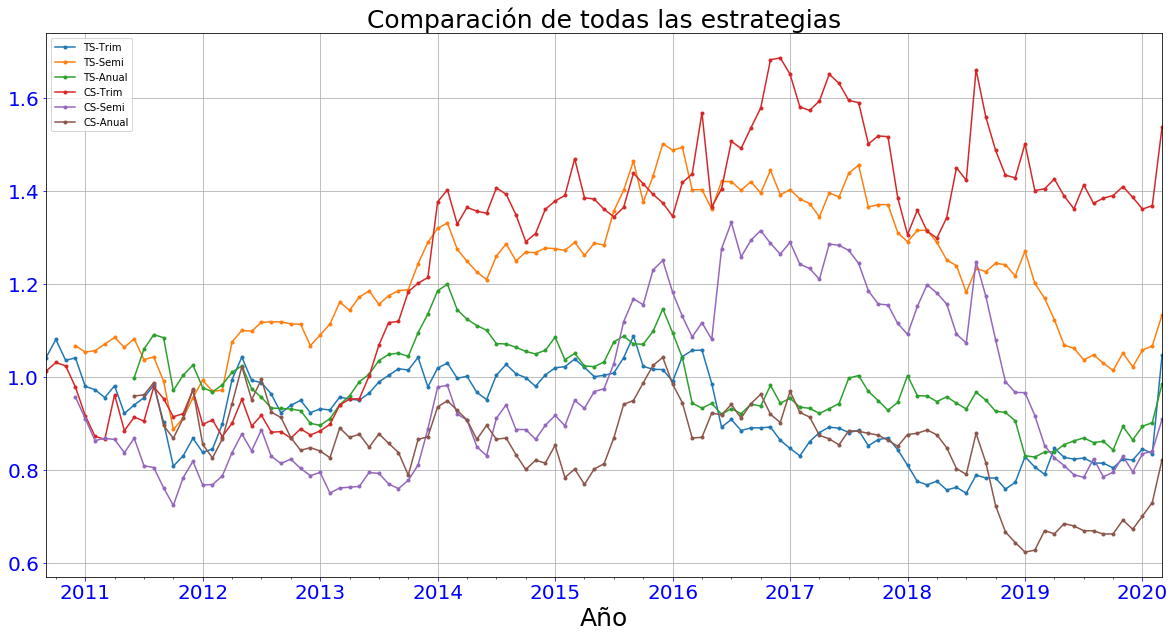

In [50]:
retorno_total_trim.cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label = "TS-Trim")
retorno_total_semi.cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label = "TS-Semi")
retorno_total.cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label = "TS-Anual")
tickers_ganadores_t_retornos['total'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label = "CS-Trim")
tickers_ganadores_s_retornos['total'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label = "CS-Semi")
tickers_ganadores_retornos['total'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label = "CS-Anual")

plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.xlabel('Año', fontsize=25, color='black')
plt.title('Comparación de todas las estrategias',fontsize=25, color='black')

plt.legend(loc="upper left")
plt.grid()

plt.legend(loc="upper left")

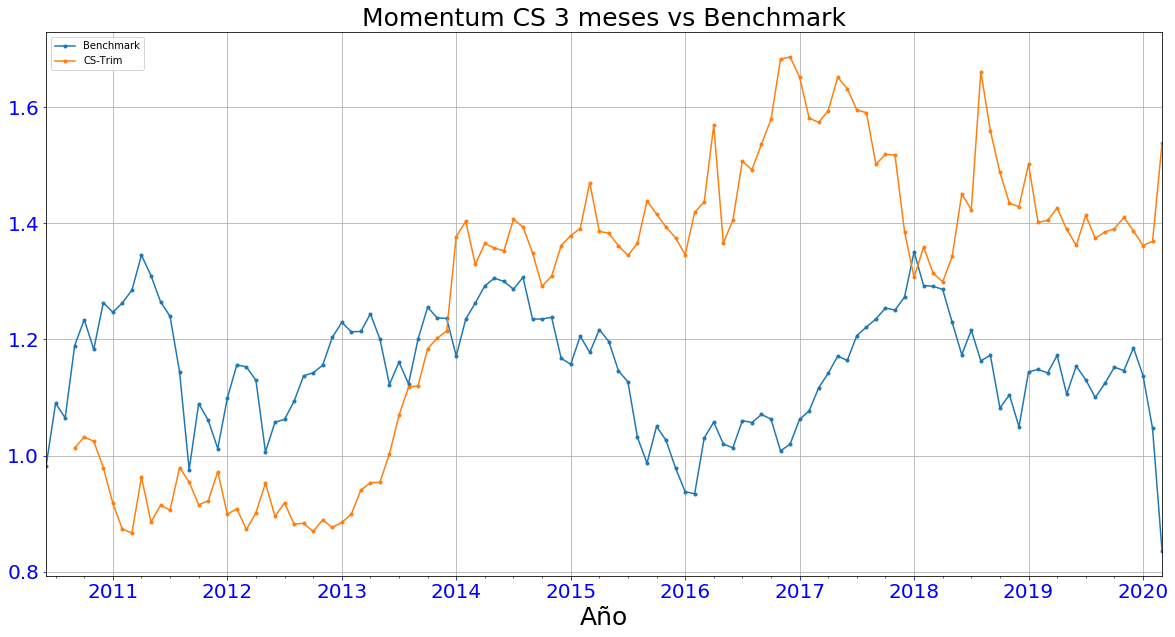

In [51]:
ret_mensual.mean(axis=1).cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label = "Benchmark")
tickers_ganadores_t_retornos['total'].cumsum().apply(np.exp).plot(marker='.', figsize=(20,10), label = "CS-Trim")

plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.xlabel('Año', fontsize=25, color='black')
plt.title('Momentum CS 3 meses vs Benchmark',fontsize=25, color='black')
plt.grid()
plt.legend(loc="upper left")

Cálculo de metricas

In [52]:
benchmark = ret_mensual.mean(axis=1)
strat = tickers_ganadores_t_retornos['total']

In [53]:
a = np.argmax(np.maximum.accumulate(strat.cumsum()) - strat.cumsum())
b = np.argmax(strat.cumsum()[:a])
i = np.argmax(np.maximum.accumulate(benchmark.cumsum()) - benchmark.cumsum())
j = np.argmax(benchmark.cumsum()[:i])

print('Sharpe CS-Trim: ' + str((strat.mean()*12)/(strat.std()*(12**0.5))))
print('Sharpe Benchmark: ' + str((benchmark.mean()*12)/(benchmark.std()*(12**0.5))))
print()
print('Retorno Promedio Anual CS-Trim: ' + str((((1+((strat.cumsum().apply(np.exp)[-1] / 1) - 1))**(1/10)) - 1)*100))
print('Retorno Promedio Benchmark: ' + str((((1+((benchmark.cumsum().apply(np.exp)[-1] / 1) - 1))**(1/10)) - 1)*100))
print()
print('Worst Drawdown CS-Trim: ' + str(((strat.cumsum().apply(np.exp)[a] / strat.cumsum().apply(np.exp)[b])-1)*100) + ' desde ' + str(b) + ' hasta ' + str(a))
print('Worst Drawdown Benchmark: ' + str(((benchmark.cumsum().apply(np.exp)[i] / benchmark.cumsum().apply(np.exp)[j])-1)*100) + ' desde ' + str(j) + ' hasta ' + str(i))
print()
print('Standar Deviation CS-Trim: ' + str(strat.std()*(12**0.5)*100))
print('Standar Deviation Benchmark: ' + str(benchmark.std()*(12**0.5)*100))
print()
print('Mayor Caida Mensual CS-Trim: ' + str(strat.min()))
print('Mayor Caida Mensual Benchmark: ' + str(benchmark.min()))
print()
print('Retorno Acumulado CS-Trim: ' + str(((strat.cumsum().apply(np.exp)[-1] / 1) - 1) *100))
print('Retorno Acumulado Benchmark: ' + str(((benchmark.cumsum().apply(np.exp)[-1] / 1) - 1) *100))

Sharpe CS-Trim: 0.28432187412738497
Sharpe Benchmark: -0.1062386414454625

Retorno Promedio Anual CS-Trim: 4.400649301679582
Retorno Promedio Benchmark: -1.7830436039535602

Worst Drawdown CS-Trim: -22.967984764043603 desde 2016-12-31 00:00:00 hasta 2018-04-30 00:00:00
Worst Drawdown Benchmark: -38.1615147049542 desde 2018-01-31 00:00:00 hasta 2020-03-31 00:00:00

Standar Deviation CS-Trim: 15.8053723674154
Standar Deviation Benchmark: 17.221842018956007

Mayor Caida Mensual CS-Trim: -0.1385235172760757
Mayor Caida Mensual Benchmark: -0.2257603024086338

Retorno Acumulado CS-Trim: 53.82679690493806
Retorno Acumulado Benchmark: -16.465722949226514


Text(0.5, 1.0, 'Histograma de frecuencia de retornos')

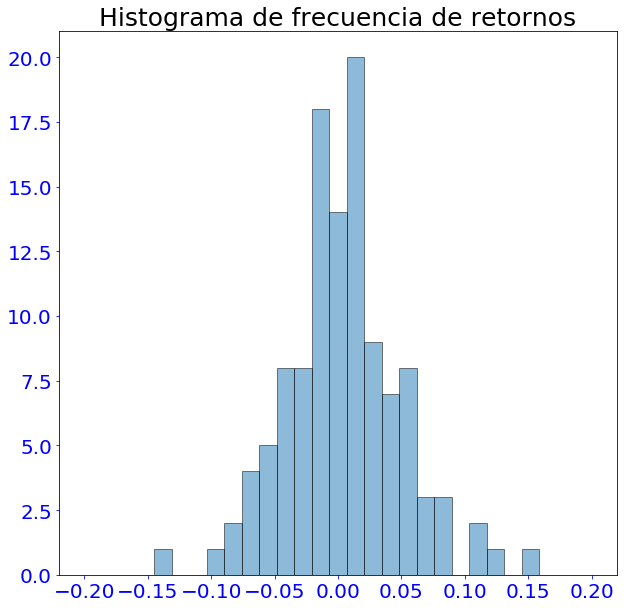

In [54]:
plt.figure(figsize=(10,10))
bins = np.linspace(-0.2,0.2, 30)
plt.hist(strat, bins,alpha=0.5, histtype='bar', ec='black')
plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.title('Histograma de frecuencia de retornos',fontsize=25, color='black')